# Convolutional Neural Network.
## Instructions and Requirements:
This week workshop will have two sections:

*   Section: 1
  *   In this section, we will implement and observe the operations of various layers used to build the CNN.
  *   By the end of the workshop, we expect you to be able to:
      1.   Explain the Convolution operation
      2.   Explain the pooling operation
      3.   Get familiar with various hyperparameters i.e. stride, padding

*   Section: 2
  *   In this section we will compile all the learning from section 1 to build a basic Convolutional Neural Network using Keras and Tensorflow.
  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/Copy of FruitinAmazon.zip" -d "/content/extracted_folder"


Archive:  /content/drive/My Drive/Copy of FruitinAmazon.zip
  inflating: /content/extracted_folder/FruitinAmazon/test/cupuacu/download (5).jpeg  
  inflating: /content/extracted_folder/FruitinAmazon/test/acai/images (2).jpeg  
  inflating: /content/extracted_folder/FruitinAmazon/test/cupuacu/download (3).jpeg  
  inflating: /content/extracted_folder/FruitinAmazon/test/acai/images (16).jpeg  
  inflating: /content/extracted_folder/FruitinAmazon/test/pupunha/download (2).jpeg  
  inflating: /content/extracted_folder/FruitinAmazon/train/pupunha/images (1).jpeg  
  inflating: /content/extracted_folder/FruitinAmazon/test/cupuacu/download (2).jpeg  
  inflating: /content/extracted_folder/FruitinAmazon/test/pupunha/download (1).jpeg  
  inflating: /content/extracted_folder/FruitinAmazon/train/acai/images (3).jpeg  
  inflating: /content/extracted_folder/FruitinAmazon/train/acai/images (4).jpeg  
  inflating: /content/extracted_folder/FruitinAmazon/test/graviola/download (1).jpeg  
  inflating

##Convolution Summary:

We convolve (slide) a small matrix also known as Filter/kernel, performing element wise matrix multiplications to produce filter-map.

  *   Objective of a convolution operations:
        1.   Apply a set of weights-a filter- to extract local features.
        2.   Use Multiple filters to extract different features.
        3.   Spatially share parameters of each filter.

Mathematically it perform following:
$$ conv(I,K)_{xy} = ∑_{i=1}^{h}\sum_{j=1}^{w}K_{ij}.I_{x+i-1,y+j-1} \tag{1} $$

Where:
- $I$ input image matrix..
-$K$ kernel/Filter used to perform convolution.

Hyper-parameters in Convolution Operations:
*   Number of Filters(K)
*   Size of Filters(F)
*   Stride(S)
*   amount of zero padding(P)

Output Dimensions is given by:

\begin{align}
\mathbf{O}  = \frac{W_{in} -f + 2p}{s} + 1 \tag{2}
\end{align}

### Exercise-1.

Perform following Convolution Operations:

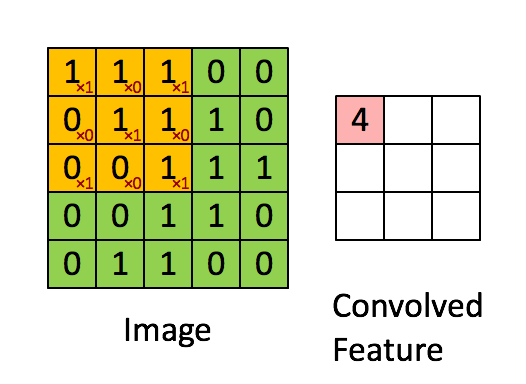

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
# Defining the input matrix as above using np.array function.
I = np.array([[1, 1, 1, 0, 0], [0, 1, 1, 1 ,0], [0, 0, 1, 1, 1,], [0, 0, 1, 1, 0], [0, 1, 1, 0, 0]])

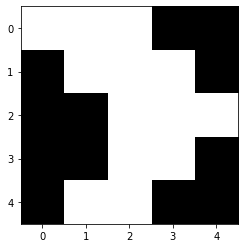

In [ ]:
# Visualizing the input.
plt.imshow(I)

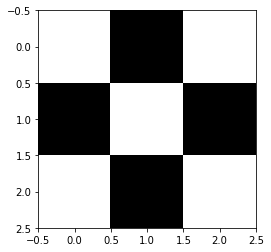

In [ ]:
# Defining the input matrix as above using np.matrix function.
K = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
# Visualizing the Filter.
plt.imshow(K)


In [ ]:
def convolution(img, filter):
  """
  Function performs convolution operations.
  Arguments:
  Inputs Arguments:
  img(nd array): numpy array of an input image.
  filter(nd array): numpy array of an input filter.
  Output Argumets:
  Filter_Map of Dimesions specified by eq(2).
  """
  output_dimension = # Your Code Here.
  filter_map = np.zeros(shape=(output_dimension, output_dimension))
  # Write a code for Convolution operation between input matrix img and Filter matrix filter

  return filter_map


In [ ]:
img = convolution(I, K)

In [ ]:
assert img.shape == (3, 3), " Convolution Operation did not produce correct output"

Test Passed


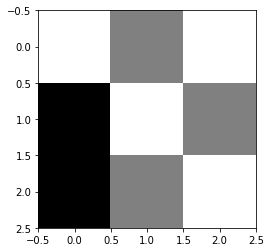

In [ ]:
plt.imshow(img)
print("Test Passed")

# Section-2: In this section we will build very basic CNN architecture, Compile and train our CNN model.

This will be further divided into following sections:


## Section-2.1: Data Pre-processing.

Expected structure of folder:

-/Datasets/

      --train/
        -- acai/....     
        -- cupuacu/---
        -- all the classes--

In [ ]:
data_dir = "/content/extracted_folder/FruitinAmazon"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Hyper-parameters:
batch_size = 32
img_height = 180
img_width = 180
validation_split = 0.2 # 80% training, 20% validation

### Load the Data:

We will use tf.keras.utility to load the image, for this function to work, your data should be in the structure suggested above.

We will do this for both training and validation dataset.

### Exercise:

1. To train a deep learning model we need to create a data pipeline, Multiple different approaches are available within keras framework;
one such framework is
  "tf.keras.utils.image_dataset_from_directory("parameter")

Implement above framework and explain the parameters you have used in the comment.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode='int',
    image_size=(img_height,img_width),
    batch_size=batch_size,
    interpolation='nearest',
    shuffle=True,
    seed=123,
    validation_split=validation_split,
    subset="training"

  )

Found 120 files belonging to 2 classes.
Using 96 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    # Your code Here.
    data_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
  )

Found 120 files belonging to 2 classes.
Using 24 files for validation.


In [ ]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['test', 'train']


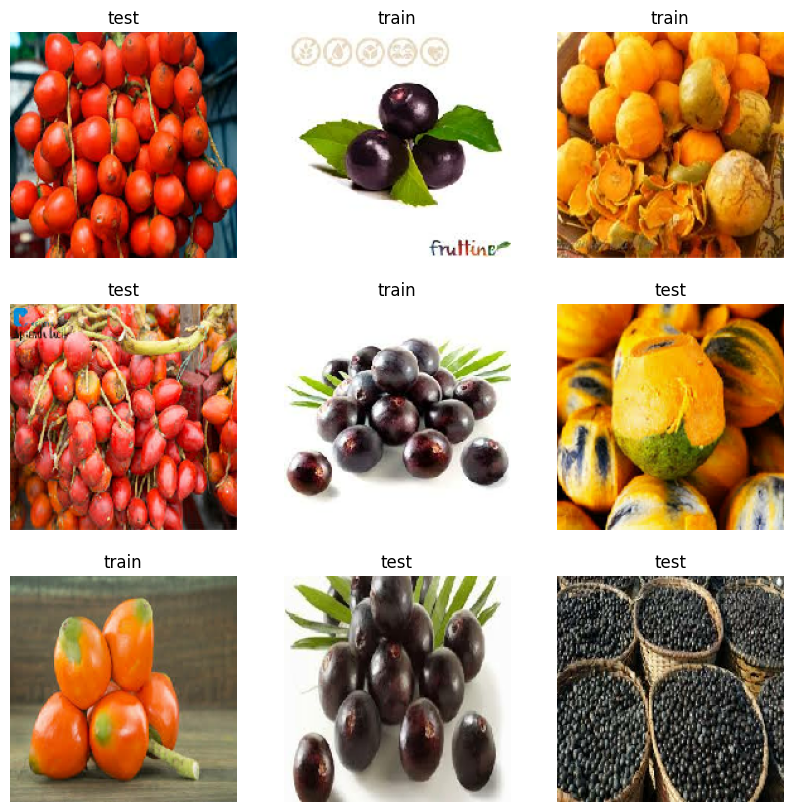

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


## Design CNN Architecture:

For this task, we will build a CNN with following layers:

Feature-Extraction and Convolution Operations.
1.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
2.   Pooling layer[max, F=(2,2), S=2].
3.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
4.   Pooling layer[max, F=(2,2), S=2].

Classification-Assigning a class probabilities to each classes.
1.   Flatten Layer()
2.   Hidden/Dense Layer [number of neurons=128].
3.   Output Layer [number of neurons=num_classes].


### Exercise:

Please fill the hyper-parameters as defined above in the below layers.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def generate_model(image_height, image_width, nchannels, num_classes):
    """
    Generates a CNN model with specified hyperparameters.

    Args:
    image_height (int): Height of an image.
    image_width (int): Width of an image.
    nchannels (int): Number of channels in the image.
    num_classes (int): Number of classes in the dataset.

    Returns:
    model: A compiled CNN model.
    """
    model = tf.keras.Sequential([
        # Rescaling input layer (normalizing pixel values)
        layers.Rescaling(1.0 / 255, input_shape=(image_height, image_width, nchannels)),

        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Flatten and Fully Connected Layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),  # Hidden dense layer
        layers.Dense(num_classes, activation='softmax')  # Output layer (softmax for multi-class classification)
    ])

    return model


img_height = 180
img_width = 180

In [ ]:
num_classes = len(class_names)
model = generate_model(img_height, img_width, 3, num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,588,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,608,578 (63.36 MB)

 Trainable params: 16,608,578 (63.36 MB)

 Non-trainable params: 0 (0.00 B)

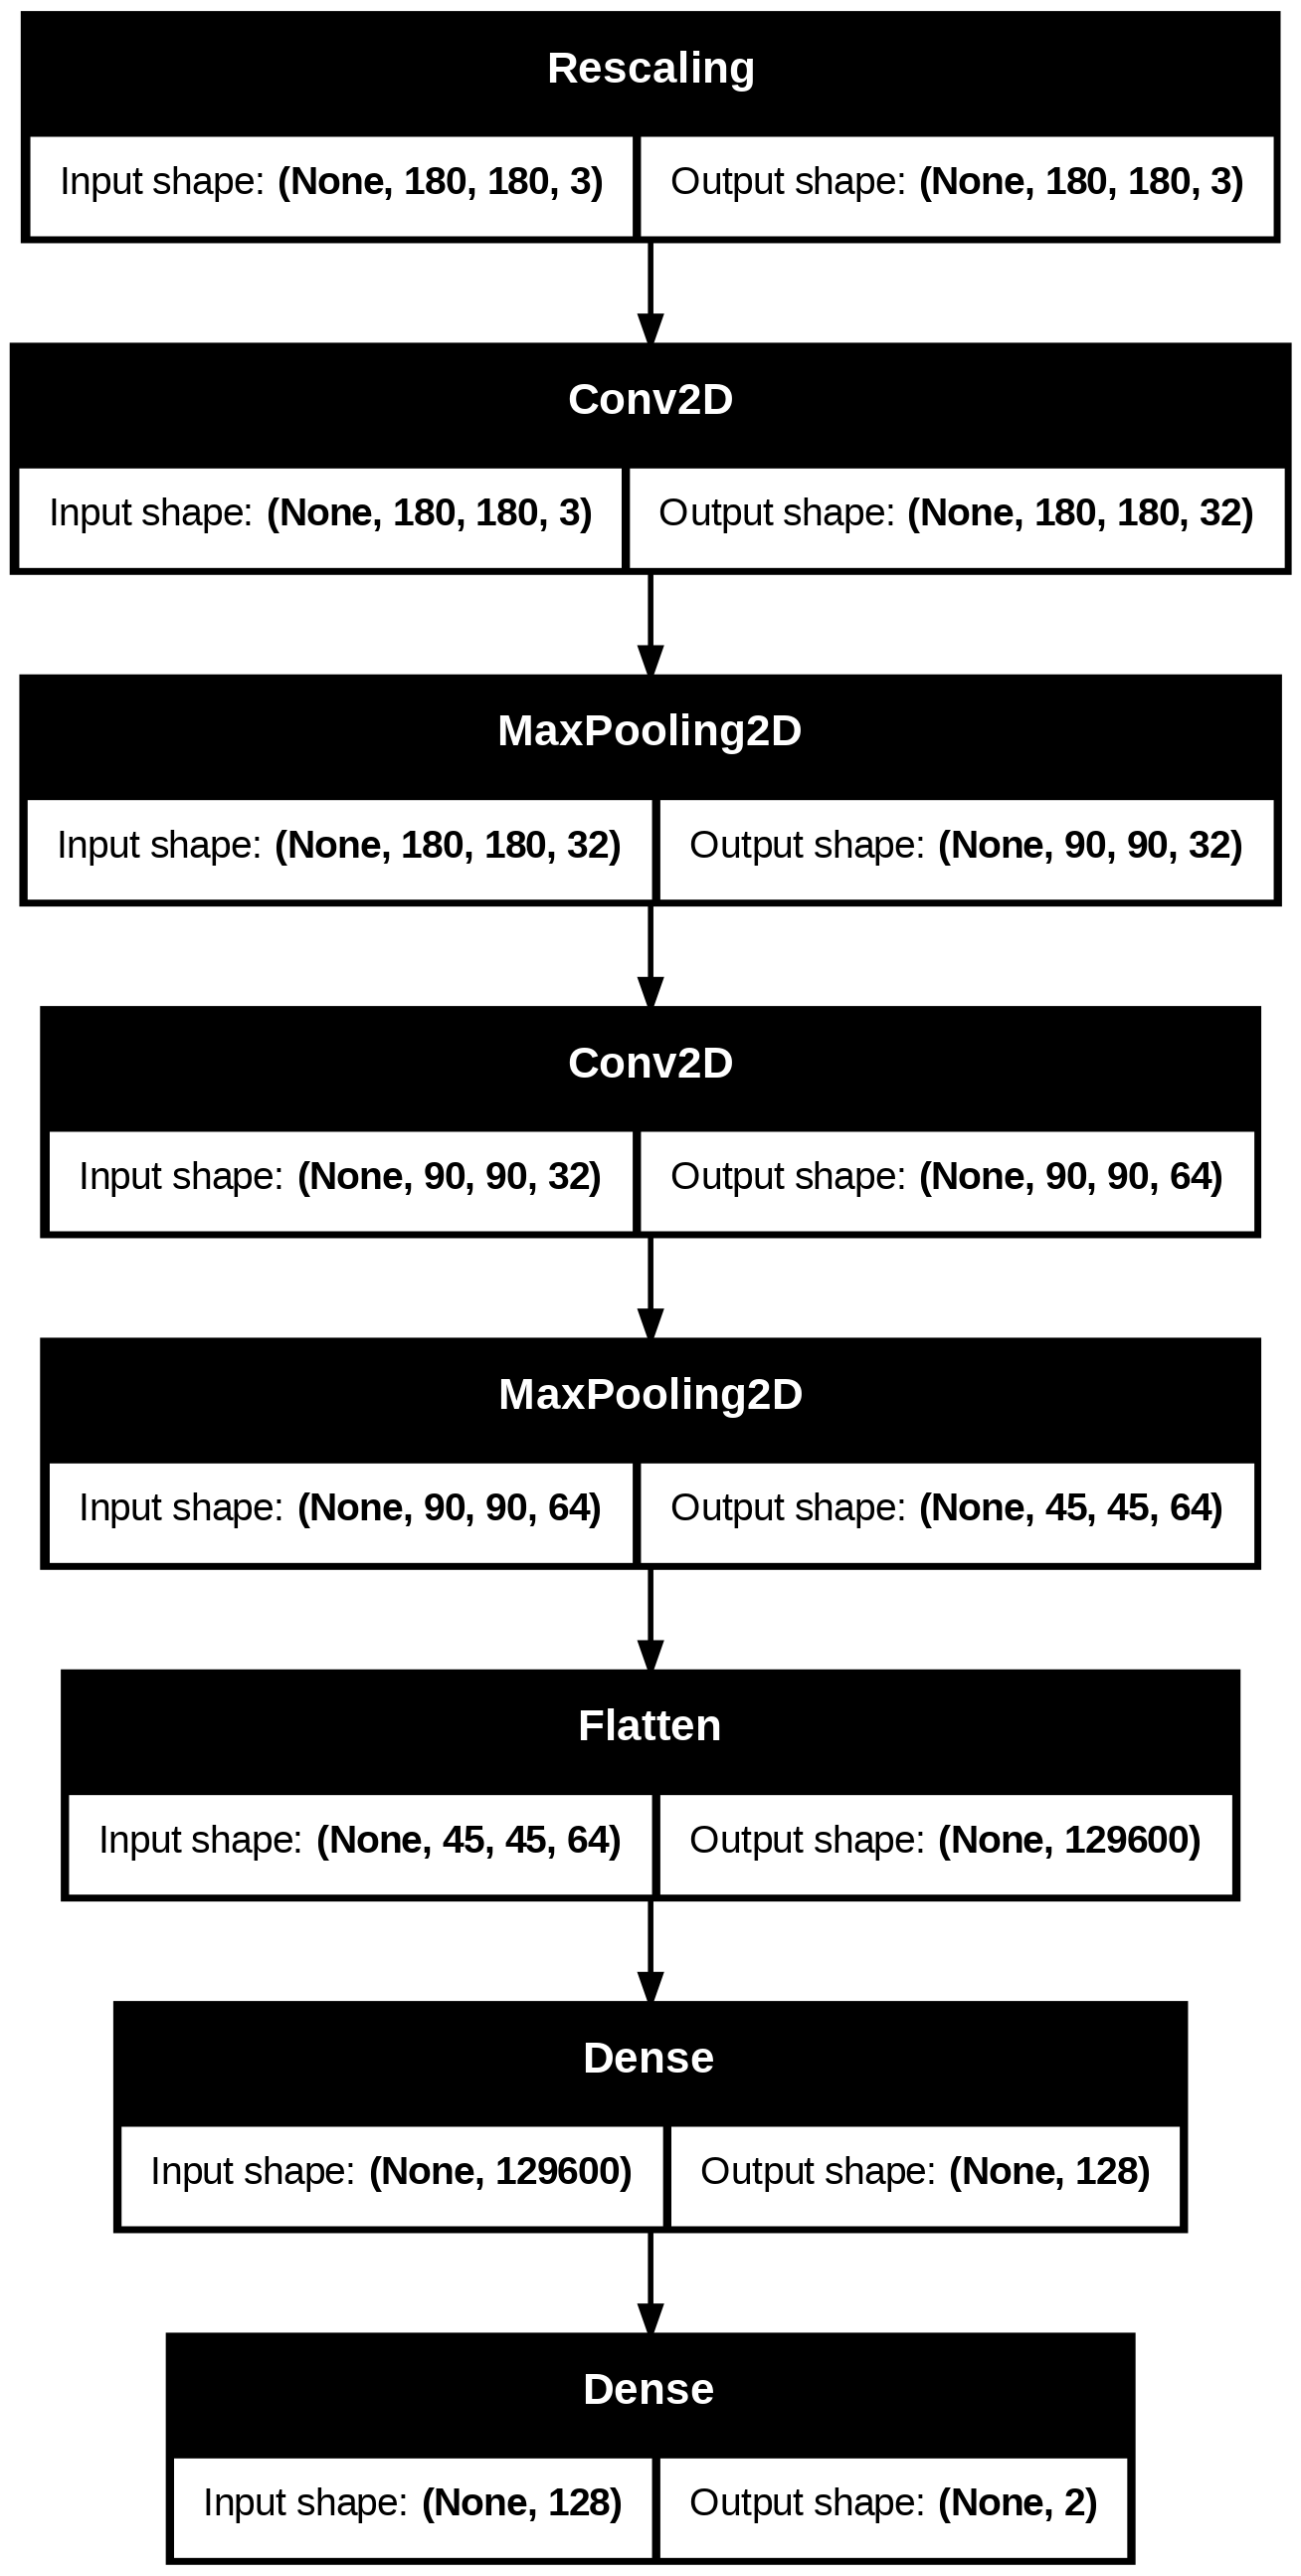

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

## Compile and Train Model.

Once we built the model, we need to compile the model before we start training.

In Model compilation, we do the following:
*   Checks for format Error.
*   Defines the loss function.
*   Defines the optimizer.
*   Defines the learning rate.
*   Defines the metrics we will be using.

For training our model we will be using:
*   loss --> SparseCategoricalCrossEntropy.
*   Optimizer --> Adam.
*   Evaluation Metric --> Accuracy.


In [ ]:
model.compile(
    optimizer='adam',  # Optimizer (Adam works well for CNNs)
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)


### Train the Model.

For training a model with all the given hyper-parameters, and argumets we invoke fit methods.

It is a standard practise to return and hold record of losses values and metric values during training in variablel-history.

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5182 - loss: 9.1931 - val_accuracy: 1.0000 - val_loss: 0.0326
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5638 - loss: 1.6419 - val_accuracy: 0.0000e+00 - val_loss: 1.1703
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.5768 - loss: 0.8031 - val_accuracy: 1.0000 - val_loss: 0.0764
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7214 - loss: 0.7677 - val_accuracy: 1.0000 - val_loss: 0.2539
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.6706 - loss: 0.6493 - val_accuracy: 1.0000 - val_loss: 0.5144
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6979 - loss: 0.6138 - val_accuracy: 1.0000 - val_loss: 0.4045
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7057 - loss: 0.5972 - val_accuracy: 1.0000 - val_loss: 0.2173
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7214 - loss: 0.5624 - val_accuracy: 1.0000 - val_loss: 0.4519
Epoch 9/10

## Observe the Model Performance.


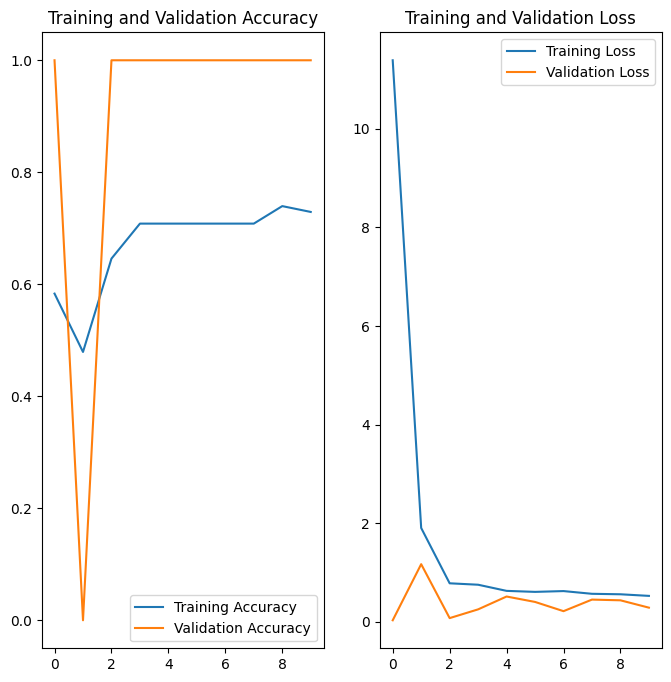

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Home Task:

Create a Test Set and Perform a model evaluation to find the test accuracy.

Based on last week built a function which predicts input examples, and also plot the result.
